<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%208%20Aquifer%20Influx/notebook/8_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 8 Aquifer Influx**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!git clone https://www.github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 715 (delta 3), reused 0 (delta 0), pack-reused 696
Receiving objects: 100% (715/715), 3.12 MiB | 2.40 MiB/s, done.
Resolving deltas: 100% (301/301), done.


## **Chapter 8.2 Schiltuis Steady-State Method**

### Functions

In [0]:
def influx_matbalance_undersaturated(pressure, Bw, Wp, Np, Bo, Nfoi, cf, cw, swi, Boi, delta_time):
  "Eq 8.3"
  # in case of undersaturated (above bubblepoint), Rp = Rs = Rsi, Gfgi = Bgi = Eg = 0
  # pressure and Bo are pressure and oil FVF data over time (so, it must be in ARRAY)
  # Bw: water FVF (RB/STB)
  # Wp: cumulative water production (STB), in ARRAY
  # Np: cumulative oil production (STB), in ARRAY
  # Bo: oil FVF
  # Nfoi, Gfgi: original oil, gas, in place (cubic ft), from volumetrics
  # cf, cw: rock, water compressibility (psi^-1)
  # swi: initial water saturation
  # Boi, Bgi: initial oil, gas FVF 

  F = Np * Bo
  Eo = Bo - Boi
  delta_time = delta_time
  delta_pressure = pressure - pressure[0]
  delta_pressure = np.abs(delta_pressure)

  Efw = ((4E-06 + (3E-06 * 0.48)) / (1 - 0.48)) * delta_pressure

  We = (Bw * Wp) + F - (Nfoi * Eo) - ((Nfoi * Boi) * Efw)

  delta_We = [j-i for i, j in zip(We[:-1], We[1:])]
  delta_We = np.append([0], delta_We)
  We_rate = delta_We / delta_time

  return(delta_pressure, Efw, Eo, F, We, We_rate)

def influx_rate_schiltuis_general(F_rate, Bw, Wp_rate):
  "Eq 8.4"
  # F_rate: reservoir voidage rate
  # Bw: water FVF
  # Wp_rate: water production rate
  We_rate = F_rate + (Bw * Wp_rate)
  return(We_rate)

def influx_rate_schiltuis_nonvolatile(Bw, Wp_rate, Bo, Rs, Bg, Np_rate, Gp_rate):
  "Eq 8.5"
  # Bo, Bg: oil, gas FVF
  # Rs: solution gas-oil ratio (scf/STB)
  # Np_rate, Gp_rate: oil, gas production rate
  We_rate = (Bw * Wp_rate) + ((Bo - (Rs * Bg)) * Np_rate) + (Bg * Gp_rate)
  return(We_rate)

def influx_rate_schiltuis_undersaturated(Bw, Wp_rate, Bo, Np_rate):
  "Eq 8.6"
  # above bubblepoint pressure, P_bubble
  We_rate = (Bo * Np_rate) + (Bw * Wp_rate)
  return(We_rate)

### Example 8.1 Determination of Schiltuis Aquifer Influx Constant at Constant Pressure

In [0]:
"Task. calculate aquifer influx constant (k')"

# known: pressure maintained above bubblepoint pressure
pi = 3200 # in psia
p_current = 2850 # current pressure, in psia
Np_rate = 5000 # oil production rate, in STB/d
Wp_rate = 1000 # water production rate, in STB/d
Bo = 1.45 # oil FVF, in RB/STB
Bw = 1.02 # water FVF, in RB/STB

# calculate aquifer influx rate (We_rate or dWe/dt)
We_rate = influx_rate_schiltuis_undersaturated(Bw, Wp_rate, Bo, Np_rate)
print("Schiltuis steady-state aquifer influx RATE above bubblepoint pressure:", We_rate, "RB/d")

# calculate k' from Eq 8.1
k_aqui = We_rate / (pi - p_current)
print("Schiltuis steady-state aquifer influx CONSTANT above bubblepoint pressure:", k_aqui, "RB/(D-psi)")

Schiltuis steady-state aquifer influx RATE above bubblepoint pressure: 8270.0 RB/d
Schiltuis steady-state aquifer influx CONSTANT above bubblepoint pressure: 23.62857142857143 RB/(D-psi)


### Example 8.2 Determination of Schiltuis Aquifer Influx Constant for Moonie Field

In [0]:
"Task. calculate k' (aquifer-influx constant)"

# known
P_bubble = 737 # psia
pi = 2532 # psia
temp = 156 # in F
# Bw = 1.02 # no information in the book, so assume similar to Problem 8.1, in RB/STB
Nfoi = 48.75 # in MSTB (million STB)
Boi = 1.078 # RB/STB
cf = 4E-06 # in psi^-1
cw = 3E-06 # in psi^-1
swi = 0.48

# conversion
Nfoi = Nfoi * 1E+06 # convert from MSTB to STB

"because pi > P_bubble, reservoir is undersaturated (above bubblepoint)"

# no data on Bw, so Bw will be assumed constant: 1.02 RB/STB
Bw = 1.02

# load data and review datetime format
data2 = pd.read_csv('/content/reservoir-engineering/Unit 8 Aquifer Influx/data/Table 8.3-Production Data Moonie Field Example 8.2.csv')
data2

,t,p,Np,Gp,Wp,Bo
0,01 January 1964,2532,0,0.000000e+00,0,1.07800
1,01 October 1964,2503,1107012,1.240000e+08,27400,1.07826
2,01 January 1965,2496,1574736,1.760000e+08,55000,1.07832
3,01 April 1965,2485,2157206,2.420000e+08,109000,1.07842
4,01 September 1965,2476,3268489,3.660000e+08,277300,1.07850
5,01 April 1966,2471,5007092,5.610000e+08,495450,1.07854
6,01 April 1967,2465,7739388,8.670000e+08,1514500,1.07860
7,01 June 1977,2442,18311694,2.050000e+09,39123000,1.07880
8,01 June 1981,2439,19657804,2.200000e+09,57345000,1.07883
9,01 July 1985,2430,20657249,2.310000e+09,78372000,1.07891


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


,Date,delta_pressure(psi),Efw,Eo(RB/STB),F(res bbl),We(res bbl),We_rate(RB/D)
0,1964-01-01,0,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000
1,1964-10-01,29,0.000303,0.00026,1.193647e+06,1.192976e+06,4353.927515
2,1965-01-01,36,0.000377,0.00032,1.698069e+06,1.718777e+06,5715.229396
3,1965-04-01,47,0.000492,0.00042,2.326374e+06,2.391239e+06,7471.802122
4,1965-09-01,56,0.000586,0.00050,3.525065e+06,3.752749e+06,8898.753412
5,1966-04-01,61,0.000638,0.00054,5.400349e+06,5.845846e+06,9873.102449
6,1967-04-01,67,0.000701,0.00060,8.347704e+06,9.826409e+06,10905.649893
7,1977-06-01,90,0.000942,0.00080,1.975466e+07,5.957164e+07,13393.975942
8,1981-06-01,93,0.000973,0.00083,2.120743e+07,7.960774e+07,13713.963971
9,1985-07-01,102,0.001067,0.00091,2.228731e+07,1.021263e+08,15103.001884


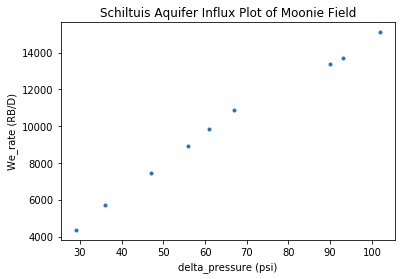

In [0]:
"Converting to Panda datetime"

# time data in format: 01 January 1964

data2['t'] =  pd.to_datetime(data2['t'], format='%d %B %Y') # format check web: https://strftime.org/
data2 # already converted to YYYY-MM-DD

"Subtracting datetimes to get time differences (how many days) IN INTEGER"

diff = [j-i for i, j in zip(data2.t[:-1], data2.t[1:])]
diff = np.array(diff)

# convert datetime format to integer
diffr_arr = []
for k in range(len(diff)):
  diffr = diff[k] / np.timedelta64(1,'D')
  diffr_arr.append(float(diffr))

# append 0 to the first index of numpy
diffr_arr = np.append([0], diffr_arr) # now diff has same dimension with time data (a)

"Calculate We"

pressure = np.array(data2.p)
Np = np.array(data2.Np)
Wp = np.array(data2.Wp)
Bo = np.array(data2.Bo)

"Material Balance"

# call function
delta_pressure, Efw, Eo, F, We, We_rate = influx_matbalance_undersaturated(pressure, Bw, Wp, Np, Bo, Nfoi, cf, cw, swi, Boi, diffr_arr)

# plot We_rate vs delta_pressure
plt.plot(delta_pressure, We_rate, '.')
plt.xlabel('delta_pressure (psi)'); plt.ylabel('We_rate (RB/D)')
plt.title('Schiltuis Aquifer Influx Plot of Moonie Field')

# result in table
schiltuis = pd.DataFrame({"Date": data2.t, "delta_pressure(psi)": delta_pressure, "Efw": Efw, "Eo(RB/STB)": Eo, "F(res bbl)": F, "We(res bbl)": We, "We_rate(RB/D)": We_rate})
schiltuis = schiltuis.fillna(0) # replace NaN with zero
schiltuis

Aquifer influx constant from slope of Schiltuis Plot: 147.42917107467179 RB/(D-psi)


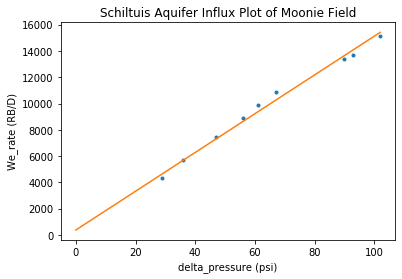

In [0]:
"Regression of Schiltuis Plot"

# import regression function from Unit 7 function folder
import sys, os 
sys.path.append('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/functions')

from regression import regression

x = np.array(schiltuis.iloc[:, 1]) # delta_pressure
y = np.array(schiltuis.iloc[:, 6]) # We_rate

c, m = regression(x, y)
print("Aquifer influx constant from slope of Schiltuis Plot:", m, "RB/(D-psi)")

# plot regression

y_reg = m * x + c

plt.plot(delta_pressure, We_rate, '.')
plt.xlabel('delta_pressure (psi)'); plt.ylabel('We_rate (RB/D)')
plt.title('Schiltuis Aquifer Influx Plot of Moonie Field')
plt.plot(x, y_reg)

## **Chapter 8.3 Van Everdingen-Hurst (VEH) Unsteady-State Method**

### Functions

### Example 8.3 Aquifer Influx using VEH Unsteady-State Method

Data similar to Problem 8.2

In [0]:
"Task. calculate aquifer influx vs time using VEH method"

# known 
pi = 2532 # psia
temp = 156 # reservoir temperature, F
P_bubble = 737 # psia
Nfoi = 48.75 # in MSTB (million STB)
Rsi = 112 # initial solution gas-oil ratio, scf/STB
Boi = 1.078 # RB/STB
Bob = 1.094 # oil FVF at bubblepoint, RB/STB
Bw = 1.02 # water FVF, no information in the book, so assume to be constant, similar to Problem 8.1, in RB/STB
swi = 0.48
cf = 4E-06 # in psi^-1
cw = 3E-06 # in psi^-1
poro = 0.177
perm = 432 # permeability, md
h = 31.8 # reservoir thicknes, ft
vbulk = 73590 # reservoir bulk volume, acre ft
mu_w = 0.38 # water viscosity, cp
mu_oil_initial = 1.02 # initial oil viscosity, cp
date_initial = '1964-01-01' # initial date of production

# conversion
Nfoi = Nfoi * 1E+06 # convert from MSTB to STB
vbulk = vbulk * 43559.9 # convert from acre-ft to cubic ft

# data used is similar to Problem 8.2
data3 = pd.read_csv('/content/reservoir-engineering/Unit 8 Aquifer Influx/data/Table 8.3-Production Data Moonie Field Example 8.2.csv')

# calculate reservoir area size
area = vbulk / h
r_R = np.sqrt(area / np.pi) # radius of reservoir, assume reservoir shape is cylindrical

ct = cf + cw # total compressibility, in aquifer sw=1
theta = 360 # full circle cylindrical
B_star = 1.119 * poro * ct * h *(r_R**2) * (theta / 360)

"calculate delta_pressure_j and visualize in table similar to Table 8.5"

# time data in format: 01 January 1964, convert to PANDA datetime format

data3['t'] =  pd.to_datetime(data3['t'], format='%d %B %Y') # format check web: https://strftime.org/

# Subtracting datetimes to get time differences from initial production date to date[i] (how many days) IN INTEGER"

diff = data3.t - data3.t[0]

# convert datetime format to integer
diffr_arr = []
for k in range(len(diff)):
  diffr = diff[k] / np.timedelta64(1,'D')
  diffr_arr.append(float(diffr))

# convert time difference from day to hour
diffr_arr = np.array(diffr_arr) * 24

# create j index for dataframe
j_index = np.arange(0, (len(data3.t)), 1)

# calculate delta_pj for each date
# append an array consists of two initial pressures [pi, pi] (as dummy) to the pressure data
p_dummy = np.append(np.array([pi, pi]), data3.p)
# delta_p_j = p_(j) - p_(j-2)
delta_p_j = [b-a for a, b in zip(p_dummy[:-2], p_dummy[2:])]
delta_p_j = 0.5 * np.array(np.abs(delta_p_j))

# construct Table 8.5
pressure_drop_calc = pd.DataFrame({"Date": data3.t, "j": j_index, "Time(hours)": diffr_arr, "Pressure(psia)": data3.p, "delta_p_j(psia)": delta_p_j})
pressure_drop_calc

,Date,j,Time(hours),Pressure(psia),delta_p_j(psia)
0,1964-01-01,0,0.0,2532,0.0
1,1964-10-01,1,6576.0,2503,14.5
2,1965-01-01,2,8784.0,2496,18.0
3,1965-04-01,3,10944.0,2485,9.0
4,1965-09-01,4,14616.0,2476,10.0
5,1966-04-01,5,19704.0,2471,7.0
6,1967-04-01,6,28464.0,2465,5.5
7,1977-06-01,7,117600.0,2442,14.5
8,1981-06-01,8,152664.0,2439,13.0
9,1985-07-01,9,188448.0,2430,6.0


In [0]:
"Full code to create Table 8.6"

j_array = np.arange(1, (len(time_array)+1), 1)

time_array = np.array(pressure_drop_calc.iloc[:, 2]) # time

delta_p_j = np.array(pressure_drop_calc.iloc[:, 4]) # delta_pj
delta_p_j_array = delta_p_j[1:]

array_j = []
array_time = []
array_delta_p_j = []
array_time_repeat = []

for i in range(len(time_array)):
  new_j = j_array[:i]
  new_time = time_array[:i]
  new_delta_p_j = delta_p_j_array[:i]

  array_j.append(new_j)
  array_time.append(new_time)
  array_delta_p_j.append(new_delta_p_j)

  # make arrays of repeated times
  new_time_repeat = np.repeat((time_array[i]), i)
  array_time_repeat.append(new_time_repeat)

"To calculate delta_time, SUBTRACT arrr_time TO arrr_time_repeat"

delta_time = np.subtract(arrr_time_repeat, arrr_time) # numpy subtract array to array

"Calculate t_DR and W_eD" 

t_DR_factor = (0.0002637 * perm) / (poro * mu_w * ct * (r_R**2))

# e.g. we'd like to calculate both parameters at July 1985, like in the book page 81; time index = 9

index = 9

t_DR_arr = []
W_eD_arr = []

for i in range(len(delta_time[index])):
  t_DR = t_DR_factor * (delta_time[index])[i]

  "calculate W_eD using Eq 6.36 and 6.37 for infinite reservoir (See: 6_examples_part2.ipynb)"
  if t_DR > 0.01 and t_DR <= 200:
    # use Eq 6.36
    W_eD = ((1.12838 * np.sqrt(t_DR)) + (1.19328 * t_DR) + (0.269872 * t_DR * np.sqrt(t_DR)) + (0.00855294 * (t_DR**2))) / (1 + (0.616599 * np.sqrt(t_DR) + (0.0413008 * t_DR)))
  if t_DR > 200:
    # use Eq 6.37
    W_eD = ((2.02566 * t_DR) - 4.29881) / np.log(t_DR)
    
  W_eD_arr.append(float(W_eD))
  t_DR_arr.append(float(t_DR))

"create into Table 8.6"

timestamp = np.array(pressure_drop_calc.iloc[:, 0][index])

veh_parameters = pd.DataFrame({"j": array_j[index], "delta_p_j(psi)": array_delta_p_j[index], "delta_time(hours)": delta_time[index], "t_DR": t_DR_arr, "W_eD": W_eD_arr})

print("Table 8.6-Calculated Times Associated with Pressure Drops at:", timestamp)
veh_parameters

Table 8.6-Calculated Times Associated with Pressure Drops at: 1985-07-01 00:00:00


,j,delta_p_j(psi),delta_time(hours),t_DR,W_eD
0,1,14.5,188448.0,1421.025338,395.944667
1,2,18.0,181872.0,1371.437852,383.986133
2,3,9.0,179664.0,1354.788039,379.959650
3,4,10.0,177504.0,1338.500179,376.015110
4,5,7.0,173832.0,1310.810816,369.296472
5,6,5.5,168744.0,1272.443856,359.959398
6,7,14.5,159984.0,1206.387533,343.805436
7,8,13.0,70848.0,534.241824,171.615900
8,9,6.0,35784.0,269.835555,96.876460


In [0]:
"calculate We, Equation 8.7"

W_eD_multipy_delta_p_j = array_delta_p_j[index] * W_eD_arr
sigma_We = np.sum(W_eD_multipy_delta_p_j)
We = B_star * sigma_We
print("Aquifer influx amount at:", timestamp, "is:", We, "res bbl")

Aquifer influx amount at: 1985-07-01 00:00:00 is: 45545561.66428348 res bbl


In [0]:
"iterate the process of calculating We for other times (October 1964 to June 1981)"

def calculate_parameter_VEH(index, t_DR_factor):
  t_DR_arr = []
  W_eD_arr = []

  for i in range(len(delta_time[index])):
    t_DR = t_DR_factor * (delta_time[index])[i]

    "calculate W_eD using Eq 6.36 and 6.37 for infinite reservoir (See: 6_examples_part2.ipynb)"
    if t_DR > 0.01 and t_DR <= 200:
      # use Eq 6.36
      W_eD = ((1.12838 * np.sqrt(t_DR)) + (1.19328 * t_DR) + (0.269872 * t_DR * np.sqrt(t_DR)) + (0.00855294 * (t_DR**2))) / (1 + (0.616599 * np.sqrt(t_DR) + (0.0413008 * t_DR)))
    if t_DR > 200:
      # use Eq 6.37
      W_eD = ((2.02566 * t_DR) - 4.29881) / np.log(t_DR)
      
    W_eD_arr.append(float(W_eD))
    t_DR_arr.append(float(t_DR))
    
  return(t_DR_arr, W_eD_arr)

# numpy array from j index 0 (initial production) to 9; [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
indextimes = np.arange(0,(len(j_index)), 1)

We_arr = []

for x in range(len(indextimes)): # range from j index 1 to 9

  t_DR_arr, W_eD_arr = calculate_parameter_VEH(x, t_DR_factor) # call function 

  # calculate We, Equation 8.7

  W_eD_multipy_delta_p_j = array_delta_p_j[x] * W_eD_arr
  sigma_We = np.sum(W_eD_multipy_delta_p_j)
  We = B_star * sigma_We
  We_arr.append(float(We))

  timestamp = np.array(pressure_drop_calc.iloc[:, 0][x])

  print("Aquifer influx amount at:", timestamp, "is:", We, "res bbl")

Aquifer influx amount at: 1964-01-01 00:00:00 is: 0.0 res bbl
Aquifer influx amount at: 1964-10-01 00:00:00 is: 506254.4946583441 res bbl
Aquifer influx amount at: 1965-01-01 00:00:00 is: 909239.1242932233 res bbl
Aquifer influx amount at: 1965-04-01 00:00:00 is: 1349294.2742815115 res bbl
Aquifer influx amount at: 1965-09-01 00:00:00 is: 2199165.2967753867 res bbl
Aquifer influx amount at: 1966-04-01 00:00:00 is: 3409326.3093490894 res bbl
Aquifer influx amount at: 1967-04-01 00:00:00 is: 5487661.051901658 res bbl
Aquifer influx amount at: 1977-06-01 00:00:00 is: 26765099.404743448 res bbl
Aquifer influx amount at: 1981-06-01 00:00:00 is: 35956377.94908929 res bbl
Aquifer influx amount at: 1985-07-01 00:00:00 is: 45545561.66428348 res bbl


In [0]:
"create into Table 8.7"

print("Table 8.7-Calculated Aquifer Influx Over the Production Dates")
veh_final_result = pd.DataFrame({"Date": data3.t, "Time(hours)": diffr_arr, "Pressure(psia)": data3.p, "delta_p_j(psia)": delta_p_j, "We(res bbl)": We_arr})
veh_final_result

Table 8.7-Calculated Aquifer Influx Over the Production Dates


,Date,Time(hours),Pressure(psia),delta_p_j(psia),We(res bbl)
0,1964-01-01,0.0,2532,0.0,0.000000e+00
1,1964-10-01,6576.0,2503,14.5,5.062545e+05
2,1965-01-01,8784.0,2496,18.0,9.092391e+05
3,1965-04-01,10944.0,2485,9.0,1.349294e+06
4,1965-09-01,14616.0,2476,10.0,2.199165e+06
5,1966-04-01,19704.0,2471,7.0,3.409326e+06
6,1967-04-01,28464.0,2465,5.5,5.487661e+06
7,1977-06-01,117600.0,2442,14.5,2.676510e+07
8,1981-06-01,152664.0,2439,13.0,3.595638e+07
9,1985-07-01,188448.0,2430,6.0,4.554556e+07


Text(0, 0.5, 'Aquifer Influx Amount (res bbl)')

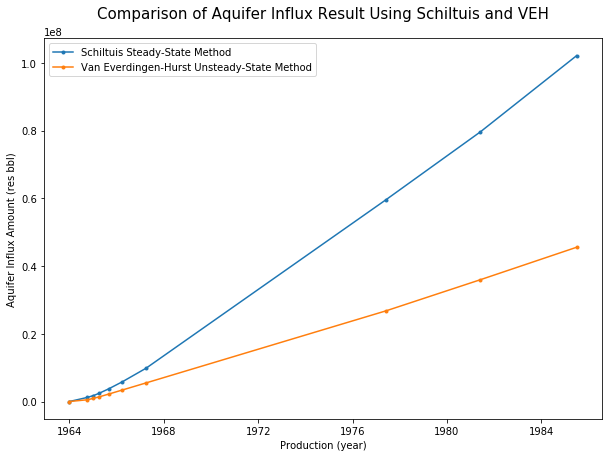

In [267]:
"Compare We result of SCHILTUIS STEADY-STATE (Problem 8.2) to this method VEH UNSTEADY-STATE (Problem 8.3)"
# RUN FIRST codes in Problem 8.2
We_schiltuis = We
We_veh = We_arr

"Create Fig 8.1"
# schiltuis plot
plt.figure(figsize=(10, 7))
p1 = plt.plot(data3.t, We_schiltuis, '.-')
p2 = plt.plot(data3.t, We_veh, '.-')
plt.legend((p1[0], p2[0]), ('Schiltuis Steady-State Method', 'Van Everdingen-Hurst Unsteady-State Method'))
plt.title("Comparison of Aquifer Influx Result Using Schiltuis and VEH", pad=20, size=15)
plt.xlabel("Production (year)"); plt.ylabel("Aquifer Influx Amount (res bbl)")

# ***

In [0]:
a = np.array([pi, pi])
b = np.append(np.array([1, 1]), a)
b

array([   1,    1, 2532, 2532])

In [0]:
data = np.array([1, 1, 2, 4, 5, 6, 10])
print(data[2:None])
print(data[:2])
[b-a for a, b in zip(data[:-2], data[2:])]

[ 2  4  5  6 10]
[1 1]


[1, 3, 3, 2, 5]

In [0]:
time_array = np.array(pressure_drop_calc.iloc[:, 2]) # time

array_arr = []

for i in range(len(time_array)):
  # new_array = pressure_array[:i+1]
  new_array = time_array[:i]
  array_arr.append(new_array)

array_arrr = array_arr[1:]
array_arrr

[array([0.]),
 array([   0., 6576.]),
 array([   0., 6576., 8784.]),
 array([    0.,  6576.,  8784., 10944.]),
 array([    0.,  6576.,  8784., 10944., 14616.]),
 array([    0.,  6576.,  8784., 10944., 14616., 19704.]),
 array([    0.,  6576.,  8784., 10944., 14616., 19704., 28464.]),
 array([     0.,   6576.,   8784.,  10944.,  14616.,  19704.,  28464.,
        117600.]),
 array([     0.,   6576.,   8784.,  10944.,  14616.,  19704.,  28464.,
        117600., 152664.])]

In [0]:
b_arr = []

for i in range(len(time_array)):
  b = np.repeat((time_array[i]), i)
  b_arr.append(b)

b_arrr = b_arr[1:]
b_arrr

[array([6576.]),
 array([8784., 8784.]),
 array([10944., 10944., 10944.]),
 array([14616., 14616., 14616., 14616.]),
 array([19704., 19704., 19704., 19704., 19704.]),
 array([28464., 28464., 28464., 28464., 28464., 28464.]),
 array([117600., 117600., 117600., 117600., 117600., 117600., 117600.]),
 array([152664., 152664., 152664., 152664., 152664., 152664., 152664.,
        152664.]),
 array([188448., 188448., 188448., 188448., 188448., 188448., 188448.,
        188448., 188448.])]

In [0]:
solved = np.subtract(b_arrr, array_arrr)
solved[8]

array([188448., 181872., 179664., 177504., 173832., 168744., 159984.,
        70848.,  35784.])

In [0]:
"Converting to Panda datetime"

# time data in format: 1 January 1964
a = np.array(["1 January 1964", "1 October 1964", "1 December 1964", "31 March 1965"])
b = np.array([1000, 2000, 3000, 4000])
raw_data = pd.DataFrame({"a": a, "b": b})
raw_data['a'] =  pd.to_datetime(raw_data['a'], format='%d %B %Y') # format check web: https://strftime.org/
# raw_data['a'] =  pd.to_datetime(raw_data['a'], format='%B %Y') "if format in: January 1964, October 1964"
raw_data # already converted to YYYY-MM-DD

"Subtracting datetimes to get time differences (how many days) IN INTEGER"

diff = [j-i for i, j in zip(raw_data.a[:-1], raw_data.a[1:])]
diff = np.array(diff)

# convert datetime format to integer
diffr_arr = []
for k in range(len(diff)):
  diffr = diff[k] / np.timedelta64(1,'D')
  diffr_arr.append(float(diffr))

# append 0 to the first index of numpy
diffr_arr = np.append([0], diffr_arr) # now diff has same dimension with time data (a)
diffr_arr

array([  0., 274.,  61., 120.])